# Na co bacha

- Pracujeme tady s neúplnými daty, jsou tu možné biasy přispěvatelstva wikidat.
- Také nebereme ohled na složení KAPEL.
- Analyzujeme hlavního interpreta – pokud existuje nějaká konvence v pořadí, např Gott/Rollins, je možné, že to výsledky zkresluje. (Šlo by v případě zájmu vyřešit.)

In [1]:
import os
import pandas as pd

In [2]:
df = pd.read_csv(os.path.join("data","CZ_RADIO_TOP_100_tydenni.csv"))
wikid = pd.read_json(os.path.join("wikidata","wikidata.json"))
df = df.merge(wikid, on="interpret_hlavni", how="outer")

## Nejdřív: kolik je v žebříčku sólo interpretů

<Axes: xlabel='rok'>

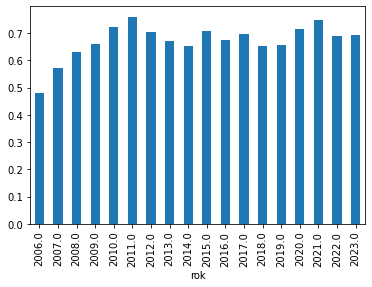

In [3]:
(df[df['velikost'] == 'člověk'].groupby('rok').size() / df[~df['velikost'].isnull()].groupby('rok').size()).plot.bar()

## Podíl žen na sólovém interpretstvu

### Podíl žen na binárním interpretstvu 

<Axes: xlabel='rok'>

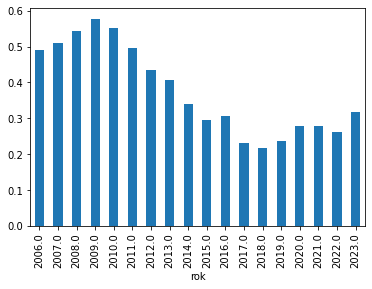

In [4]:
(df[(df['gender'] == 'žena')].groupby('rok').size() / df[df['gender'].isin(['žena','muž'])].groupby('rok').size()).plot.bar()

<Axes: xlabel='rok'>

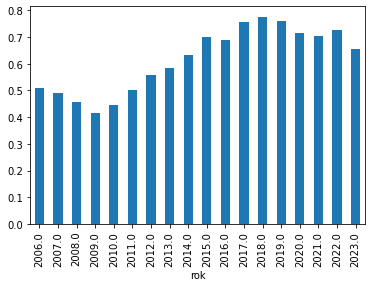

In [18]:
(df[(~df['gender'].isnull()) & (df['gender'] == 'muž')].groupby('rok').size() / df[~df['gender'].isnull()].groupby('rok').size()).plot.bar()

### Podíl lidí s jiným genderem než "muž"

<Axes: xlabel='rok'>

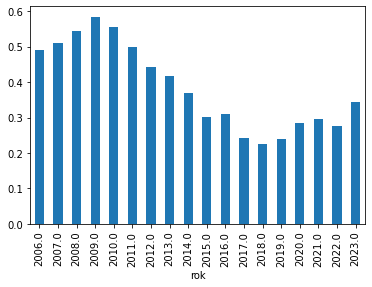

In [5]:
(df[(~df['gender'].isnull()) & (df['gender'] != 'muž')].groupby('rok').size() / df[~df['gender'].isnull()].groupby('rok').size()).plot.bar()

Hustý.

## Pozice v hitparádě

### Průměrná pozice písně podle genderu

In [6]:
df[~df['gender'].isnull()].groupby('gender')['pozice'].mean()

gender
genderfluid    43.996086
muž            49.122019
nebinární      50.940541
žena           49.560581
Name: pozice, dtype: float64

### Střední pozice písně podle genderu

In [7]:
df[~df['gender'].isnull()].groupby('gender')['pozice'].median()

gender
genderfluid    44.0
muž            48.0
nebinární      53.0
žena           49.0
Name: pozice, dtype: float64

### Kolik týdnů byl který gender na první místě hitparády

In [8]:
df[df['pozice'] == 1].groupby('gender').size()

gender
genderfluid     27
muž            330
žena           215
dtype: int64

### Seznam nebinárního interpretstva

In [9]:
df[df['gender'].isin(['genderfluid','nebinární'])][['interpret_hlavni','gender']].drop_duplicates()

,interpret_hlavni,gender
38146,Miley Cyrus,genderfluid
52007,Christina Perri,nebinární
59946,Demi Lovato,genderfluid
62465,Sam Smith,nebinární
90709,Lil Uzi Vert,nebinární


## Počty hitů na jednotlivce

In [10]:
pd.DataFrame(df[~df['gender'].isnull()].groupby('interpret_hlavni')['track'].nunique()).merge(wikid[['interpret_hlavni','gender']], on='interpret_hlavni', how='outer').groupby('gender')['track'].mean()

gender
genderfluid    11.500000
muž             3.025490
nebinární       4.000000
žena            3.955947
Name: track, dtype: float64

Ženy se v průměru prosadí 4 písničkami, muži 3, ale nic bych z toho nevyvozoval.

## Věk

In [1]:
df['vek'] = df['rok'] - df['datum_narozeni']

NameError: name 'df' is not defined

In [12]:
df.groupby('gender')['vek'].mean()

gender
genderfluid    24.986301
muž            32.969293
nebinární      25.372973
žena           29.218997
Name: vek, dtype: float64

Překvapivě blízko.

In [13]:
pd.DataFrame(df[~df['vek'].isnull()].groupby('interpret_hlavni')['vek'].min()).merge(wikid[['interpret_hlavni','gender']], on='interpret_hlavni', how='outer').groupby('gender')['vek'].mean()

gender
genderfluid    18.500000
muž            32.128141
nebinární      23.500000
žena           27.206030
Name: vek, dtype: float64

První zjevení se v hitparádě: ženy o 5 let dříve než muži.

In [14]:
pd.DataFrame(df[~df['vek'].isnull()].groupby('interpret_hlavni')['vek'].max()).merge(wikid[['interpret_hlavni','gender']], on='interpret_hlavni', how='outer').groupby('gender')['vek'].mean()

gender
genderfluid    31.000000
muž            35.929648
nebinární      29.000000
žena           31.527638
Name: vek, dtype: float64

Poslední zjevení se v hitparádě: ženy o 4 roky dříve než muži.

## Podíl žen mezi českými interprety a mezi zahraničními

In [15]:
df[(df['zeme_puvodu'] == "Česko") & (df['gender'] == "žena")].groupby('gender').size() / len(df[(df['zeme_puvodu'] == "Česko") & (df['gender'].isin(["muž","žena"]))])

gender
žena    0.321759
dtype: float64

In [16]:
df[(df['zeme_puvodu'] != "Česko") & (~df['zeme_puvodu'].isnull()) & (df['gender'] == "žena")].groupby('gender').size() / len(df[(df['zeme_puvodu'] != "Česko") & (~df['zeme_puvodu'].isnull()) & (df['gender'].isin(["muž","žena"]))])

gender
žena    0.381471
dtype: float64

In [17]:
df[(df['zeme_puvodu'] == "Spojené státy americké") & (df['gender'] == "žena")].groupby('gender').size() / len(df[(df['zeme_puvodu'] == "Spojené státy americké") & (df['gender'].isin(["muž","žena"]))])

gender
žena    0.512305
dtype: float64